In [10]:
import numpy as np
import astropy.units as u
import time
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))
import poppy
import skimage
from skimage.registration import phase_cross_correlation
import copy
from importlib import reload

import magpyx
from magpyx.utils import ImageStream
import purepyindi
from purepyindi import INDIClient
client0 = purepyindi.INDIClient('localhost', 7624)
client0.start()

from math_module import xp, xcipy, np_array
import utils
import fsm_utils
import cam_utils
from imshows import imshow1, imshow2, imshow3
from matplotlib.patches import Circle

v_bias = np.array([[50,50,50]]).T

wavelength = 633e-9
fl = 500e-3
fsm_pupil_diam = 6.8e-3
as_per_lamD = (wavelength/fsm_pupil_diam*u.radian).to(u.arcsec)
print(as_per_lamD)

pxscl_lamD = 3.45e-6 / (fl * wavelength/fsm_pupil_diam)
print(1/pxscl_lamD)
print((pxscl_lamD * as_per_lamD).to(u.radian)*100)
print((1200*u.microradian).to(u.radian))


19.200826816825295 arcsec
13.491048593350387
0.00138 rad
0.0012 rad


In [17]:
fsm = ImageStream('fsm')
fsm.write(0*v_bias)

In [3]:
reload(cam_utils)
cam = cam_utils.CAM('campupil')


In [14]:
npsf = 200
cam.set_roi(475, 850, npsf, client0)

In [ ]:
cam.set_exptime(0.0001, client0)

INFO:utils:Got semaphore index 0.


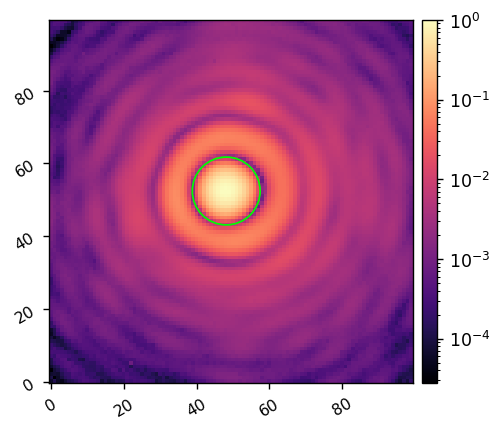

In [4]:
fsm.write(v_bias)

cam.Nframes = 1000
im_bias = cam.snap()

cen = utils.centroid(im_bias)
imshow1(im_bias, lognorm=True, patches=[Circle(cen, 1.22/pxscl_lamD, fill=False, color='lime')])


In [15]:
fsm.write(v_bias)

In [12]:
pzt = 'c'
cam.Nframes = 1000

Nv = 101
Vs = np.linspace(-50, 50, Nv)
# ims = np.zeros((Nv, npsf, npsf))
for i in range(Nv):
    if pzt=='a':
        diff = np.array([[Vs[i],0,0]]).T
    elif pzt=='b':
        diff = np.array([[0,Vs[i],0]]).T
    elif pzt=='c':
        diff = np.array([[0,0,Vs[i]]]).T
    print(v_bias + diff )
    fsm.write(v_bias + diff )
    time.sleep(1)
    # im = cam.snap()
    # ims[i] = im
fsm.write(v_bias)



[[50.]
 [50.]
 [ 0.]]
[[50.]
 [50.]
 [ 1.]]
[[50.]
 [50.]
 [ 2.]]
[[50.]
 [50.]
 [ 3.]]
[[50.]
 [50.]
 [ 4.]]
[[50.]
 [50.]
 [ 5.]]
[[50.]
 [50.]
 [ 6.]]
[[50.]
 [50.]
 [ 7.]]
[[50.]
 [50.]
 [ 8.]]
[[50.]
 [50.]
 [ 9.]]
[[50.]
 [50.]
 [10.]]
[[50.]
 [50.]
 [11.]]
[[50.]
 [50.]
 [12.]]
[[50.]
 [50.]
 [13.]]


KeyboardInterrupt: 

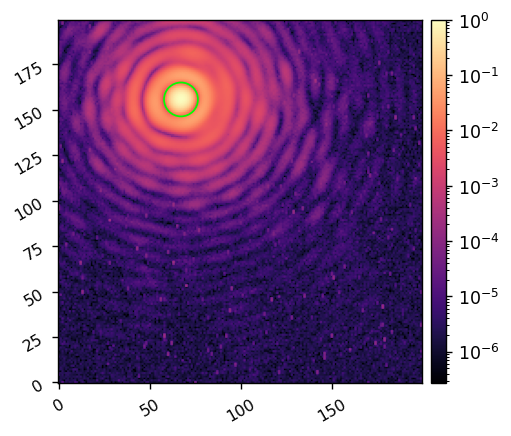

In [29]:
i = 100
cen = utils.centroid(ims[i])
imshow1(ims[i], lognorm=True, patches=[Circle(cen, 1.22/pxscl_lamD, fill=False, color='lime')])

In [30]:
utils.save_fits(f'data/ims_pzt_{pzt}.fits', ims)

Saved data to:  data/ims_pzt_c.fits


# PZT A

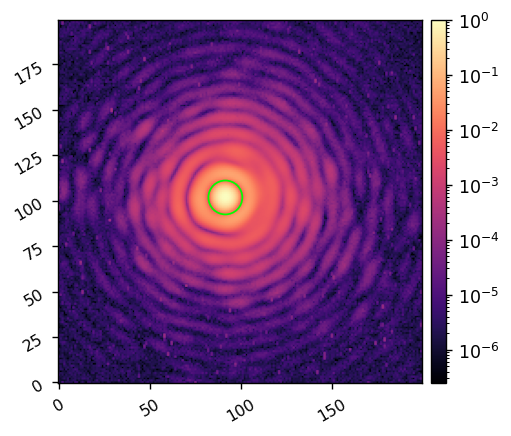

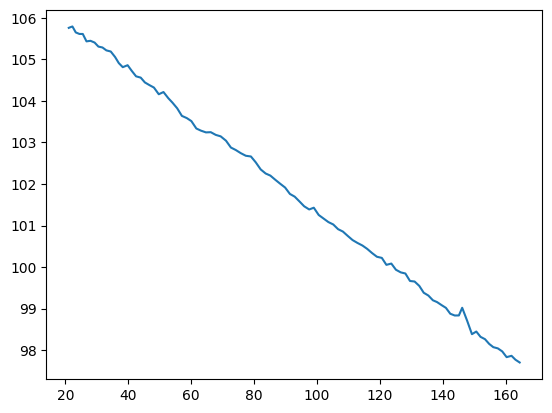

In [15]:
# PZT A
pzt = 'a'
ims = utils.load_fits(f'data/ims_pzt_{pzt}.fits')

i = 50
cen = utils.centroid(ims[i])
imshow1(ims[i], lognorm=True, patches=[Circle(cen, 1.22/pxscl_lamD, fill=False, color='lime')])

cents = []
for i in range(ims.shape[0]):
    cen = utils.centroid(ims[i])
    cents.append(cen)
cents = np.array(cents).T

plt.plot(cents[0], cents[1])

# PZT B

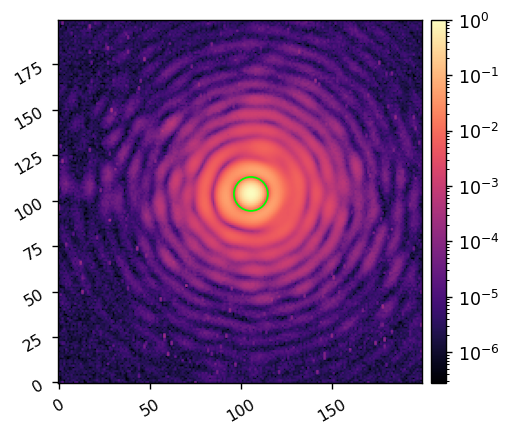

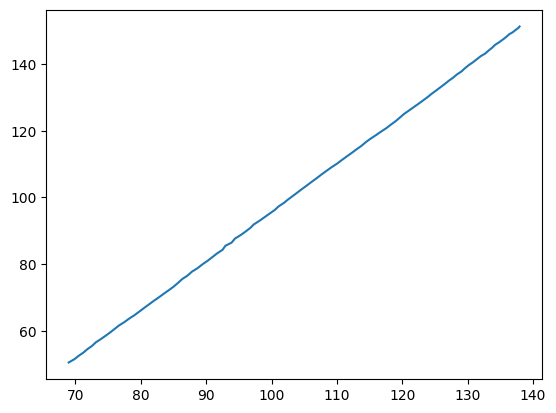

In [13]:
# PZT B
pzt = 'b'
ims = utils.load_fits(f'data/ims_pzt_{pzt}.fits')

i = 50
cen = utils.centroid(ims[i])
imshow1(ims[i], lognorm=True, patches=[Circle(cen, 1.22/pxscl_lamD, fill=False, color='lime')])

cents = []
for i in range(ims.shape[0]):
    cen = utils.centroid(ims[i])
    cents.append(cen)
cents = np.array(cents).T

plt.plot(cents[0], cents[1])

# PZT C

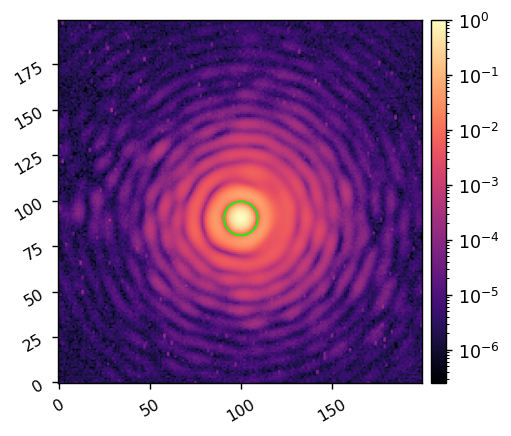

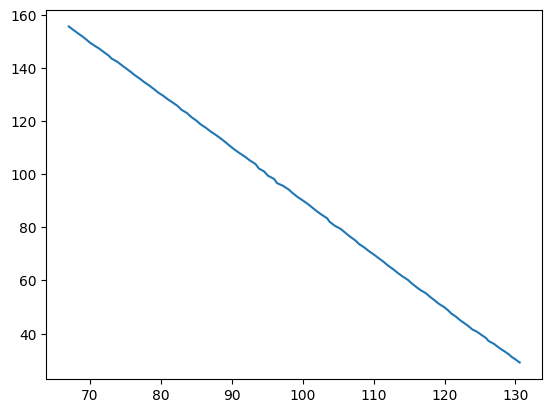

In [12]:
# PZT C
pzt = 'c'
ims = utils.load_fits(f'data/ims_pzt_{pzt}.fits')

i = 50
cen = utils.centroid(ims[i])
imshow1(ims[i], lognorm=True, patches=[Circle(cen, 1.22/pxscl_lamD, fill=False, color='lime')])

cents = []
for i in range(ims.shape[0]):
    cen = utils.centroid(ims[i])
    cents.append(cen)
cents = np.array(cents).T

plt.plot(cents[0], cents[1])